In [42]:
from pandas import read_csv, to_datetime, concat
from quandl import get
import matplotlib import pyplot, style

In [43]:
style.use("fivethirtyeight")

In [44]:
# carregar o primeiro dataframe
key = open("key").read()[:-1]
df1 = get("XFRA/SES", authtoken = key)

# carregar o segundo dataframe
df2 = read_csv("XRPBTC.csv")
df2.set_index("Date", inplace=True)
df2.index = to_datetime(df2.index)

In [45]:
# criar um terceiro dataframe apenas com as colunas Open, High, Low e Close
df3 = df1[["Open", "High", "Low", "Close"]]
df3.corr()

,Open,High,Low,Close
Open,1.000000,0.999487,0.999566,0.999128
High,0.999487,1.000000,0.999192,0.999654
Low,0.999566,0.999192,1.000000,0.999523
Close,0.999128,0.999654,0.999523,1.000000


In [46]:
# adaptar o segundo dataframe para criar um quarto dataframe
df2.rename(columns = { "Mid" : "Open", "Last" : "Close" }, inplace = True)
df4 = df2[["Open", "Close", "Low", "High"]]

# somar o quarto e quinto dataframe
df5 = concat([df3, df4], sort = False)
df5.tail(5)

,Open,High,Low,Close
Date,,,,
2017-05-23,0.000145,0.000159,0.000130,0.000144
2017-05-22,0.000141,0.000165,0.000115,0.000141
2017-05-21,0.000163,0.000178,0.000160,0.000164
2017-05-20,0.000168,0.000189,0.000147,0.000168
2017-05-19,0.000164,0.000200,0.000130,0.000169


In [59]:
# criar dois novos dataframes, um com o desvio padrão e outro com a média da coluna Open
mean = df1["Open"].rolling(30).mean()
std_dev = df1["Open"].rolling(30).std()

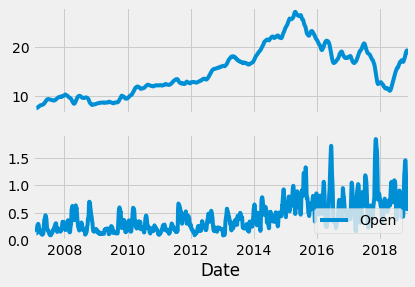

In [60]:
# plotar os gráficos em paralelo do valor da média e o desvio padrão do Open
ax1 = pyplot.subplot2grid((2, 1),(0, 0))
ax2 = pyplot.subplot2grid((2, 1), (1, 0), sharex = ax1)

mean.plot(ax = ax1)
std_dev.plot(ax = ax2)
pyplot.legend(loc = 4)
pyplot.show()
